In [36]:
import geopandas as gpd
import numpy as np
import pandas as pd
from glob import glob
from modules.Base import BaseModule

class GreenAreas(BaseModule):
    def __init__(self) -> None:
        super().__init__()
        self.cols = ['ID_AV', 'ID_PLACA', 'geometry']
        pass

    def load_data(self):
        self.scenarios = []
        [self.scenarios.append(gpd.read_file(file)[self.cols].to_crs(self.default_crs)) for file in glob('/app/assets/green_areas/*')]
        [gdf.fillna(0, inplace=True) for gdf in self.scenarios];
        self.current = self.scenarios[0]
        pass

    def update_plate_area(self, plate_id, scenario_id):
        mask = self.current['ID_PLACA'] == plate_id
        self.current = self.current[~mask]

        new_scenario = self.scenarios[scenario_id]
        mask = new_scenario['ID_PLACA'] == plate_id
        new_scenario = new_scenario[mask]
        
        self.current = pd.concat([self.current, new_scenario])
        pass


In [49]:
ga = GreenAreas()
ga.load_data()

<Axes: >

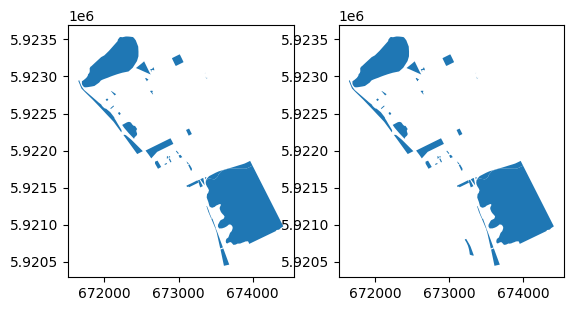

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ga.current.plot(ax = ax[0])
# ga.scenarios[0].plot(ax = ax[0])
ga.update_plate_area(plate_id=1, scenario_id=1)
ga.current.plot(ax = ax[1])
# ga.scenarios[1].plot(ax = ax[1])

In [55]:
from shapely.geometry import Polygon
gdf = ga.current
# for idx, row in gdf.iterrows():
#     polygon = row['geometry']
#     if isinstance(polygon, Polygon):  # Asegúrate de que estés tratando con polígonos, no con geometrías multipolígonos
#         contour = list(polygon.exterior.coords)
#         gdf.at[idx, 'contorno'] = contour


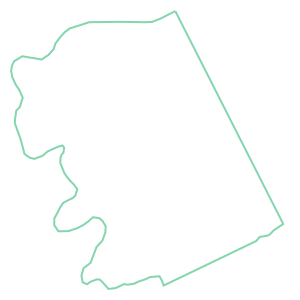

In [64]:
gdf.loc[0, 'geometry'].exterior